# TMBd Movie Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**Overview**: I am going to perfom Explatory Data Analysis to see what insight I can derive from the TMBd Movies Dataset. This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue collected between 1960 - 2016.

The questions I seek to answer from the dataset have been defined further down the report.

**Dataset Files**
1. Variable Definitions: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
2. Dataset: https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv.

In [1]:
#Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#Loading and Previewing Our Dataset:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Checking the general overview of our data:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#Checking the Shape of the Dataset:
df.shape

(10866, 21)

The dataset contains 10866 rows and 21 columns.

Now let us generate some basic summary statistics from our dataset:

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From our output above, we can see that the columns: revenue, budget, runtime, budget_adj and revenue_adj contain zero values in them.

### Data Cleaning

#### 1. Droping irrelevant columns
I do not need the following columns in my analysis: id, imdb_id, homepage, tagline, overview, keywords, budget_adj and revenue_adj. I am dropping them because they will not affect my analysis.

In [6]:
#Dropping the columns that wont affect my analysis:
df.drop(['homepage','tagline','overview', 'id', 'imdb_id','keywords', 'budget_adj','revenue_adj'], axis=1, inplace = True)
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

#### 2. Null values
From our data overview earlier, we determined that we had columns with missing data. Let us further explore and drop them

In [7]:
#Identifying Missing Values:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

Dropping all the rows with missing values because they represent less than 10% of our data, thus will not have a significant effect on our analysis.

In [8]:
#Checking that we do not have more null values
df=df.dropna()
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

#### 3. Duplicates
Check for duplicates

In [9]:
#Checking and Dropping any Duplicates:
df.duplicated().sum()

1

In [10]:
#Extracting the duplicated record
df[df.duplicated(keep=False)]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
2089,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010


We found 1 duplicated record and on further exploration, we see that it is the same exact record all through so we will drop it.

In [11]:
#Drop the duplicated record
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

#### 4. Changing Data types
We had earlier seen from the general data overview that the `release_date` is captured as an object. We are going to convert it into datetime and extract month for our analysis.We can then drop the `release_date` because it is no longer needed.

In [12]:
# change release_date from object to datetime and extract the month name
df['release_month'] = pd.to_datetime(df['release_date']).dt.month_name()
#df['release_month'].head

#drop release_date
df.drop(['release_date'], axis=1, inplace = True)
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'vote_count',
       'vote_average', 'release_year', 'release_month'],
      dtype='object')

#### 5. Zero Values
From our basic summary statistic, the columns `budget` and `revenue` had zero values that could be brought about by various reasons like wrong data entry or the information not existing. For eligibility purpose, I will drop all the zero observations.

In [13]:
#droping zero values in budget and revenue columns and checking the shape of our trimmed dataset
df.drop(df[(df['budget']==0) & (df['revenue']==0)].index, inplace=True)
df.shape

(5966, 13)

#### 6. Splitting values


In [14]:
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,release_month
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,June
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,May


The columns `cast`,`production_companies` and `genres` that I intend to use in my analysis are piped but I'd want them as seperate records. I am going to create an exploded copy of the dataset that I will use to answer `cast`, `genre` and `production_companies` related questions. 

In [46]:
def split_values(x):
    
    # Copying the Data Frame
    df2 = df.copy()
    
    # Splitting the string values
    df2[x] = df2[x].str.split('|')
    
    # Explode the whole dataset based on the splitted column
    return df2.explode(x)

#cast_df = split_values('cast')
#cast_df.head(5)

<a id='eda'></a>
## Exploratory Data Analysis

I will be perfroming both univariate and bivariate analysis on the dataset per the research questions that follow below.

### 1. Univariate Analysis
#### a. Which year had the most number of movies produced?
I am using the `.value_counts()` to return a list in descending order

In [16]:
#Count the number of movies released per year
year_most = df['release_year'].value_counts()
year_most = pd.DataFrame(year_most).reset_index().rename(columns={'index':'Year', 'release_year':'Number'})
#View the top 5 years
year_most.head()

,Year,Number
0,2013,318
1,2011,303
2,2014,293
3,2012,280
4,2010,268


The highest number of movies was released in **2013**. We can create a bar chart to show the top five years in terms of movie production.

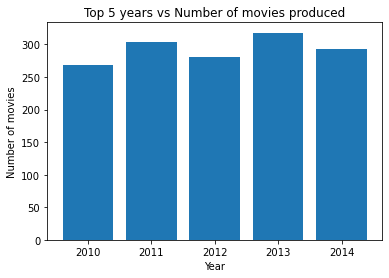

In [17]:
plt_data = year_most.head()
plt.bar(plt_data['Year'],plt_data['Number'])
plt.title('Top 5 years vs Number of movies produced')
plt.ylabel('Number of movies')
plt.xlabel('Year')
plt.show()

#### b. Which director has produced the most number of movies?

In [18]:
director_df = split_values('director')
#director_df.shape
director_df['director'].value_counts()

Woody Allen         30
Steven Spielberg    30
Clint Eastwood      26
Ridley Scott        23
Martin Scorsese     22
                    ..
Stuart Ortiz         1
Paddy Considine      1
Sean Durkin          1
Dermot Mulroney      1
Harold P. Warren     1
Name: director, Length: 2844, dtype: int64

**Steven Spielberg** and **Woody Allen** have produced the most number of movies with each having produced 30.         

#### c. Which production house had the most number of movies produced?

In [19]:
production_house_df = split_values('production_companies')
production_house_df['production_companies'].value_counts()
#production_house_df.head()

Universal Pictures                        417
Warner Bros.                              408
Paramount Pictures                        353
Twentieth Century Fox Film Corporation    238
Columbia Pictures                         229
                                         ... 
Artists Public Domain                       1
Crystal City Entertainment                  1
Forthcoming Productions                     1
Beachfront Films                            1
Norm-Iris                                   1
Name: production_companies, Length: 5094, dtype: int64

At 417, **Universal Pictures** has produced the most number of movies.

#### d. What is the most watched movie genre?

In [20]:
genres_df = split_values('genres')
genres_df['genres'].value_counts()
#genres_df.head()

Drama              2754
Comedy             2089
Thriller           1816
Action             1561
Romance            1043
Adventure           981
Crime               933
Horror              832
Science Fiction     754
Family              590
Fantasy             558
Mystery             502
Animation           290
Music               206
History             201
War                 171
Documentary          94
Western              87
Foreign              40
TV Movie              9
Name: genres, dtype: int64

The most popular genre is **drama**

#### e. Which actor has featured in the most number of movies?

In [21]:
actors_df = split_values('cast')
actors_df['cast'].value_counts()
#actors_df.head()

Robert De Niro       66
Bruce Willis         59
Samuel L. Jackson    58
Nicolas Cage         56
Morgan Freeman       46
                     ..
Richard Wilson        1
Jeanette Nolan        1
Paul Simon            1
Sean Marshall         1
Stephanie Nielson     1
Name: cast, Length: 10551, dtype: int64

**Robert De Niro** has acted in the most number of movies.

#### f. What is the longest movie produced and what is the average runtime?
We can use the `describe` function to check the maximum and average run time for the movies.

In [22]:
df.runtime.describe()

count    5966.000000
mean      106.855515
std        22.871738
min         0.000000
25%        93.000000
50%       103.000000
75%       116.000000
max       705.000000
Name: runtime, dtype: float64

The longest runtime for a movie from our dataset is **705 minutes** long i.e **11.75 hours**. This is a very long time for a movie. We can further investigate what the movie is, how popular it was and how much profit it generated. I suspect it has poor profit and not so popular but we will get to see that.
We can also see that the average movie time is **103 minutes**, which tallies with most movies (or at least the ones I have watched :-D)

### 2. Bivariate Analysis
On this section, we are going to look at the relation between different variables from our dataset.
#### a. What is the relationship between runtime and movie popularity?

In [23]:
#Finding correlation
df['runtime'].corr(df['popularity'])

0.18510132171839858

The correlation between the two variables is 0.18510132171839858, we can say there exists a weak positive correlation. Let us visualize this in a scatter plot.

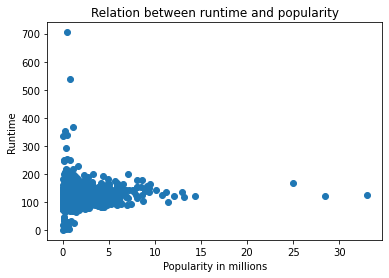

In [24]:
#Visualizing this relation in a scatter plot:
plt.scatter((df['popularity']),df['runtime'])
plt.title('Relation between runtime and popularity')
plt.xlabel('Popularity in millions')
plt.ylabel('Runtime')
plt.show()

Let's also extract the movie titles for the outliers. In this case, the two with runtimes > 400 minutes and ones with more than 25 million viewers and examine them further.

In [25]:
df.query('popularity >=20')['original_title']

0          Jurassic World
1      Mad Max: Fury Road
629          Interstellar
Name: original_title, dtype: object

The three most popular movies are **Jurassic World**, **Mad Max: Fury Road** and **Interstellar**. (Which I'd agree with because they are a few of my favourites). 
But are popular movies necessarily ones that are highly rated? We shall check from our data.

In [26]:
df.query('runtime >=400')['original_title']

2214         The Pacific
2722    Band of Brothers
Name: original_title, dtype: object

A quick google search shows the two movies **The Pacific** and **Band of Brothers** are both tv shows that have several mini episodes hence adding up to the long runtimes. Just because they are not popular and have very long runtimes, it may not necessarily mean they have lower ratings like I had earlier assumed. Let's confirms this.

In [27]:
#Correlation between runtime and vote average is positive
df['runtime'].corr(df['vote_average'])

0.3146200051155252

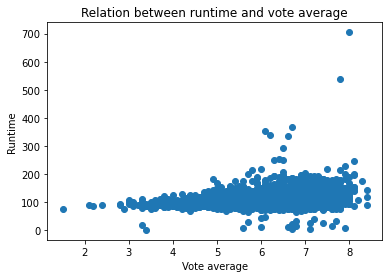

In [28]:
plt.scatter((df['vote_average']),df['runtime'])
plt.title('Relation between runtime and vote average')
plt.xlabel('Vote average')
plt.ylabel('Runtime')
plt.show()

We can indeed see that the two movies which were our outliers are doing pretty well in terms of voter ratings

Now let us check the relationship between voter average and popularity:
#### b. Are popular movies necessarliy the ones with higher ratings?

In [29]:
df['popularity'].corr(df['vote_average'])
#Shows a positive correlation

0.29239035817945874

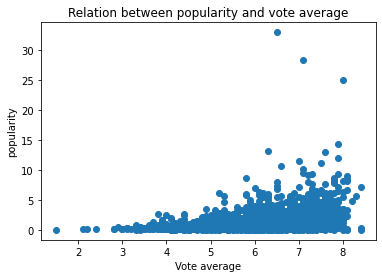

In [30]:
plt.scatter((df['vote_average']),df['popularity'])
plt.title('Relation between popularity and vote average')
plt.xlabel('Vote average')
plt.ylabel('popularity')
plt.show()

We can see there are very many movies that are not popular (Have less than 5million views) but are still highly rated. But overall, there seems to be a positive relationship between the two variables. Our three most popular movies from before (Jurassic World, Mad Max: Fury Road and Interstellar) all have ratings higher than 6.

#### c. How has the average runtime been affected over the years?

In [31]:
runtime_by_year = df.groupby('release_year')['runtime'].mean()
runtime_by_year = pd.DataFrame(runtime_by_year).reset_index()
runtime_by_year = runtime_by_year.sort_values('runtime', ascending=False)
runtime_by_year.head()

,release_year,runtime
2,1962,136.312500
3,1963,134.333333
5,1965,133.909091
1,1961,131.615385
9,1969,121.272727


#### d. Does a higher budget always translate to higher revenue?

In [32]:
#Does a higher budget always translate to a high revenue?
df['revenue'].corr(df['budget'])
#There exists a very high positive correlation between the two.

0.7018131478814749

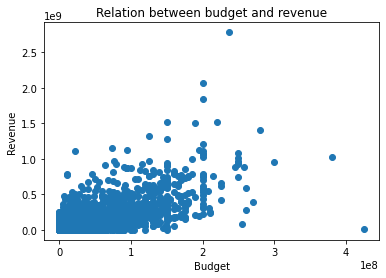

In [33]:
#Visualizing the correlation
plt.scatter((df['budget']),df['revenue'])
plt.title('Relation between budget and revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

From the plot we can conclude that a higher budget more often than not means more revenue. We however have outlier that we can further examine by creating a profits variable. I.e `Revenue-Budget`

In [34]:
df['profit']=df['revenue']-df['budget']
df['profit'].head()

0    1363528810
1     228436354
2     185238201
3    1868178225
4    1316249360
Name: profit, dtype: int64

With the profit variable, let's check the most and least profitable movies of all time

In [35]:
df[df['profit']==df['profit'].min()][['original_title', 'profit', 'release_year']]

,original_title,profit,release_year
2244,The Warrior's Way,-413912431,2010


The least profitable movie as we can see above is **The Warrior's way** released in 2010. It made a loss of 413.9 million

In [36]:
df[df['profit']==df['profit'].max()][['original_title', 'profit', 'release_year']]

,original_title,profit,release_year
1386,Avatar,2544505847,2009


The most profitable movie as we can see above is **avatar** released in 2009. It made a pprofit of 2.5 billion

#### e. What was the most profitable year for movies in terms of average profit?

In [37]:
#Average profit over the years
profit_by_year = df.groupby('release_year')['profit'].mean()
profit_by_year = pd.DataFrame(profit_by_year).reset_index()
profit_by_year = profit_by_year.sort_values('profit', ascending=False)
profit_by_year.head(2)

,release_year,profit
55,2015,7.372299e+07
17,1977,6.309385e+07


Overall, the year 2015 had the highest profit average. 

In [38]:
profit_by_year.tail(2)

,release_year,profit
3,1963,9.506124e+06
6,1966,2.265157e+06


1966 had the least average profit over the years. Let us visualize profit for the last 10 years.

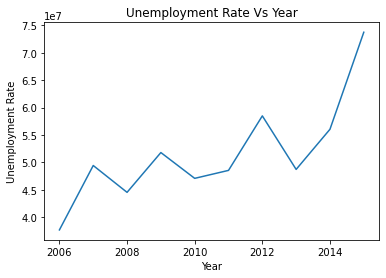

In [39]:
profit_by_year = profit_by_year.sort_values('release_year', ascending=False).head(10)
plt.plot(profit_by_year['release_year'], profit_by_year['profit'])
plt.title('Unemployment Rate Vs Year')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.show()

From our graph above, we can see that there has neither been a steady increase or decrease in profits over the last 10 years in the dataset.

#### f. How does popularity and vote_average affect profits?

In [40]:
df['profit'].corr(df['popularity'])

0.6139516056403315

A popular movie is more likely to rake in more profits which is expected since one of the sources of revenue for movies is viewership.

In [41]:
df['profit'].corr(df['vote_average'])

0.24554841555946202

There is a correlation between profit and vote average, though very week. Meaning the vote_average is not likely to affect the profits very much.

#### g. Does a longer movies have higher budgets?

In [42]:
#runtime vs budget
df['runtime'].corr(df['budget'])

0.24437667577633557

There is a small positive correlation between runtime and budget. This means longer movies are likely to have costed more to make. But the relationship is very weak.

#### h. Which month overall has been the most profitable and with the highest average of popularity?

In [43]:
#month vs profit, popularity, rating

month_profit = df.groupby('release_month')['profit','popularity','vote_average'].mean()
month_profit = pd.DataFrame(month_profit).reset_index()
month_profit = month_profit.sort_values('profit', ascending=False)
month_profit

C:\Users\HP\AppData\Local\Temp/ipykernel_22320/908104932.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  month_profit = df.groupby('release_month')['profit','popularity','vote_average'].mean()


,release_month,profit,popularity,vote_average
6,June,9.152077e+07,1.172609,6.072327
8,May,7.381760e+07,1.089624,6.070450
9,November,7.113522e+07,1.147203,6.146977
2,December,6.584198e+07,1.031153,6.263265
5,July,6.509127e+07,1.082984,6.041126
7,March,4.130942e+07,0.923008,5.978373
0,April,3.629536e+07,0.787018,5.938724
1,August,2.797173e+07,0.800787,5.896498
10,October,2.771597e+07,0.911527,6.093039
3,February,2.683999e+07,0.805747,5.978934


#### i. How has audience grown over the years?

Movies released in June are more likely to be popular and profitable whereas January has been the least performing over the years. This is an assumption that can be further tested using a prediction model.

In [44]:
#how has audience grown over the years?
popularity_growth = df.groupby('release_year')['popularity'].mean()
popularity_growth = pd.DataFrame(popularity_growth).reset_index()
popularity_growth = popularity_growth.sort_values('popularity', ascending=False)
popularity_growth.head()

,release_year,popularity
55,2015,2.030554
54,2014,1.690192
53,2013,1.018727
44,2004,1.001112
43,2003,0.996571


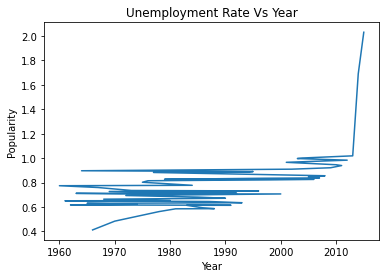

In [45]:
popularity_by_year = popularity_growth.sort_values('release_year', ascending=False).head(10)
plt.plot(popularity_growth['release_year'], popularity_growth['popularity'])
plt.title('Unemployment Rate Vs Year')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

<a id='conclusions'></a>
## Conclusions

I performed analysis on individual values before going further to establish any relationships between variables. I run the correlation function on all the variables I tested and they all seemed to have a correlation, some more than others. That said, I know correlation does not always imply causation and hence, further statistical analysis would be required to make more accurate conclusions and predictions if need be.

#### Limitations
1. I dropped all missing values and zero values in some columns which might have had implications that I missed out on this analysis.
2. I could have made the code more efficient by using more functions especially to plot graphs.

##### Reference Sources
- https://www.geeksforgeeks.org/
- https://www.w3schools.com/
- https://stackoverflow.com/